<a href="https://colab.research.google.com/github/kritikamandale/Python_is_a_language/blob/main/Day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = sns.load_dataset("titanic")

print("Original Shape : ",df.shape)
print("\nFirst 5 rows:")
print(df.head(10))

Original Shape :  (891, 15)

First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1

In [4]:
print("Missing values: ")
print(df.isnull())

Missing values: 
     survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  

In [5]:
print("Missing values: ")
print(df.isnull().sum())

Missing values: 
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [6]:
print("Missing Value Percentage:")
print(df.isnull().sum()/len(df)*100)

Missing Value Percentage:
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [7]:
#fill numerical value
df['age'].fillna(df['age'].median(),inplace=True)

/tmp/ipython-input-1608022863.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [8]:
#fill categorical data with mode
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

/tmp/ipython-input-3842135637.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)


In [9]:
#drop column with too many missing values
df.drop(columns = ['deck'], inplace=True)
print("\nMissing Values After Cleaning: ")
print(df.isnull().sum())


Missing Values After Cleaning: 
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [10]:
#outlier
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 -Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print("Lower Limit: ",lower_limit)
print("Upper Limit: ",upper_limit)

Lower Limit:  -26.724
Upper Limit:  65.6344


In [11]:
#Find Outliers
outliers = df[(df['fare'] < lower_limit) | (df['fare'] > upper_limit)]
print("Number of outlier in Fare : ",outliers.shape[0])

Number of outlier in Fare :  116


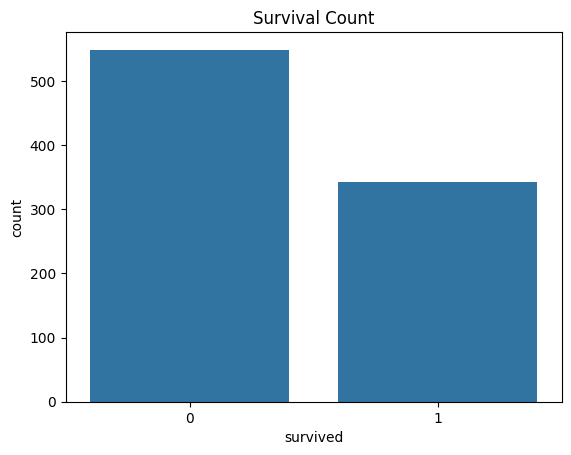

In [12]:
plt.figure()
sns.countplot(x='survived',data=df)
plt.title("Survival Count")
plt.show()

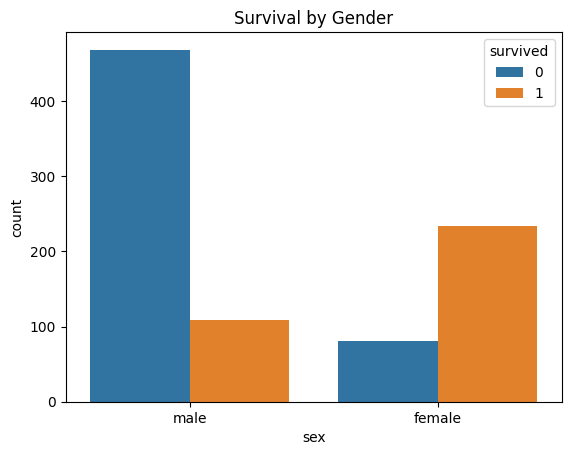

In [13]:
plt.figure()
sns.countplot(x='sex',hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()

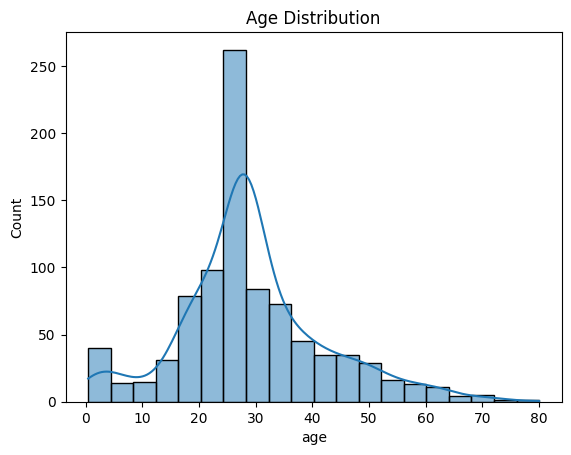

In [14]:
plt.figure()
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()